In [2]:
import time
import numpy as np
from sklearn import model_selection
import pandas as pd #import pandas
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  auc, confusion_matrix, mean_squared_error, pair_confusion_matrix
from sklearn.metrics import  roc_auc_score, roc_curve, classification_report, log_loss
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf

from warnings import simplefilter
from sklearn.model_selection import RepeatedKFold
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=Warning)

sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

2024-09-29 11:45:36.774535: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-29 11:45:37.334681: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-29 11:45:39.139089: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-09-29 11:45:42.040117: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-29 11:45:

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6



2024-09-29 11:45:42.468824: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-29 11:45:42.468960: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-29 11:45:42.468972: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2019] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.
2024-09-29 11:45:42.469013: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-29 11:45:42.469657: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created

In [4]:
df2 = pd.read_csv('../Datasets/RefSeq.csv')
df = pd.read_csv('../Datasets/CompSeq.csv')

X = np.array(df.drop(['class'], axis=1))
X = X.astype('float32')
y = np.array(df['class'])
y = LabelEncoder().fit_transform(y)

X2 = np.array(df2.drop(['class'], axis=1))
X2 = X2.astype('float32')
y2 = np.array(df2['class'])
y2 = LabelEncoder().fit_transform(y2)

In [5]:
seed = 42
X_train, X_test2, y_train, y_test2 = train_test_split(X, y, test_size=0.2, random_state=seed)
X_train2, X_test, y_train2, y_test = train_test_split(X2, y2, test_size=0.8, random_state=seed)

print(X_test.shape,X_train.shape)

(838860, 16) (52428, 16)


In [11]:
model = MLPClassifier(hidden_layer_sizes=100, solver='adam', activation='relu', shuffle=True, max_iter=1000, alpha=0.001, learning_rate='adaptive', early_stopping=True)

model.fit(X_train, y_train)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = {'accuracy' : make_scorer(accuracy_score), 'precision' : make_scorer(precision_score, average='micro'),
           'recall' : make_scorer(recall_score, average='micro'),  'f1_score' : make_scorer(f1_score, average='micro')}

results = model_selection.cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)

print("Cross validation score  : {0:.2%} (+/- {1:.2%})".format(np.mean(results['test_accuracy']), np.std(results['test_accuracy'])*2))
print("precision score         : {0:.2%} (+/- {1:.2%})".format(np.mean(results['test_precision']), np.std(results['test_precision'])*2))
print("recall score            : {0:.2%} (+/- {1:.2%})".format(np.mean(results['test_recall']), np.std(results['test_recall'])*2))
print("f1_score                : {0:.2%} (+/- {1:.2%})".format(np.mean(results['test_f1_score']), np.std(results['test_f1_score'])*2))

Cross validation score: 98.82% (+/- 0.39%)
precision score: 98.82% (+/- 0.39%)
recall score: 98.82% (+/- 0.39%)
f1_score: 98.82% (+/- 0.39%)


In [24]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy_ = accuracy_score(y_test, predictions)
recall_= recall_score(y_test, y_pred, average='micro')
precision_ = precision_score(y_test, y_pred, average='micro', zero_division=0)
mse_ = mean_squared_error(y_test, y_pred)
f1score_ = f1_score(y_test, y_pred, average='micro')

print(">>> Metrics")
print("Accuracy  :", (accuracy_ ))
print("Recall    :", (recall_))
print("Precision :", (precision_))
print("F1 Score  :", (f1score_))
print("MSE       :", (mse_))

>>> Metrics
Accuracy  : 0.9942743723624919
Recall    : 0.9942743723624919
Precision : 0.9942743723624919
F1 Score  : 0.9942743723624919
MSE       : 89.39814510168561


In [29]:
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy_, precision_, recall_, f1score_]
}
metrics_df = pd.DataFrame(metrics_data)
metrics_df.to_csv('../Metrics_Files/MLP_Metrics.csv', index=False)
print("Metrics stored into MLP_Metrics.csv")

Metrics stored into MLP_Metrics.csv


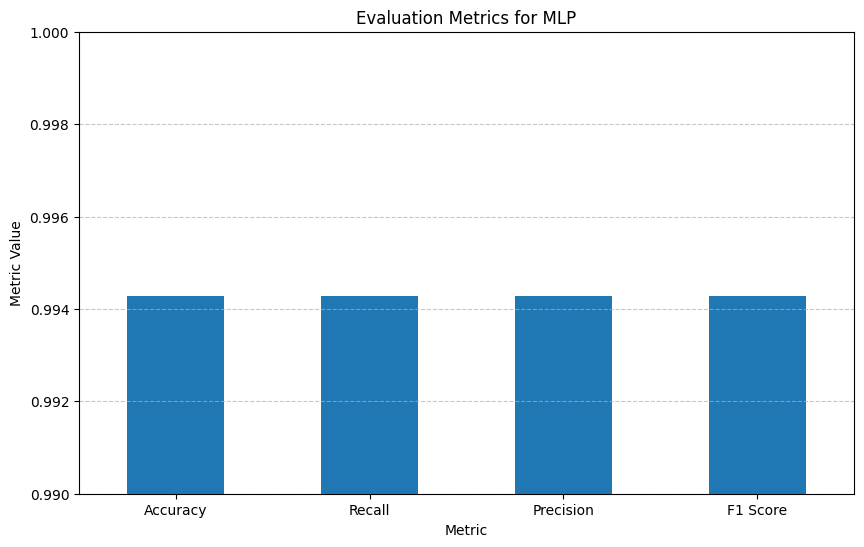

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '../Metrics_Files/MLP_Metrics.csv'  # Replace with your actual file path
metrics_df = pd.read_csv(file_path)

# Set the metric as the index for better visualization
metrics_df.set_index('Metric', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(metrics_df))  # Use seaborn's husl palette

# Create a bar plot
metrics_df['Value'].plot(kind='bar')

# Customizing the plot
plt.title('Evaluation Metrics for MLP')
plt.ylabel('Metric Value')
plt.ylim(0.990, 1)  # Set the y-axis limit
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add grid for better readability
plt.show()